# Topic Modelling for 'Friends' sitcom dataset

### About the Dataset

"Friends" is an American television sitcom, created by David Crane and Marta Kauffman, which aired on NBC from September 22, 1994, to May 6, 2004, lasting ten seasons. With an ensemble cast starring Jennifer Aniston, Courteney Cox, Lisa Kudrow, Matt LeBlanc, Matthew Perry and David Schwimmer, the show revolves around six friends in their 20s and 30s who live in Manhattan, New York City. The series was produced by Bright/Kauffman/Crane Productions, in association with Warner Bros. Television. The original executive producers were Kevin S. Bright, Kauffman, and Crane.

Kaggle link: https://www.kaggle.com/datasets/sujaykapadnis/friends/data?select=friends.csv

friends.csv variables:

- text: Dialogue as text
- speaker: Name of the speaker
- season: Season Number
- episode: Episode Number
- scene: Scene Number
- utterance: Utterance Number

### About the Topic Modelling project

I am a devoted fan of the 'Friends' sitcom, having rewatched the series numerous times. Among the characters, Chandler Bing stands out as my favorite male character. His witty humor never fails to bring a smile to my face. The recent loss of the actor, Matthew Perry, who portrayed him, deeply saddened fans around the worlds. In tribute to him and the entire cast of the series, I undertook a small project using this captivating dataset.

In this project, I'll visualize text data using WordCloud, employ the LDA model for topic modeling, and compute coherence scores to assess the model's quality and find the optimal number of topics. I also create an interactive visualization with pyLDAvis, saving it as an HTML link for exploration.

# I/ Import data

In [1]:
# Load panda library & read data set
import pandas as pd
friends_data = pd.read_csv(r"C:\Users\trant\OneDrive\Documents\Portfolio Projects\friends.csv")

# preview data
friends_data.head()

,text,speaker,season,episode,scene,utterance
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4
4,"(They all stare, bemused.)",Scene Directions,1,1,1,5


# II/ Data preprocessing

In [7]:
# Import libraries, classes & datasets

import re
import nltk

from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

To eliminate redundant words from the dialogues, I employed the STOPWORDS dataset provided by the Gensim library, containing a compilation of the 337 most frequently used stop words.

In [13]:
# Check list of stopwords in gensim
print(STOPWORDS)
print(len(STOPWORDS))


frozenset({'because', 'whereby', 'indeed', 'six', 'besides', 'those', 'this', 'them', 'thence', 'we', 'thin', 'could', 'using', 'within', 'ours', 'someone', 'only', 'full', 'co', 'of', 'that', 'except', 'amoungst', 'your', 'nowhere', 'under', 'several', 'just', 'hers', 'none', 'computer', 'made', 'everyone', 'becomes', 'one', 'done', 'due', 'thick', 'am', 'give', 'ourselves', 'now', 'does', 'ever', 'in', 'beyond', 'whether', 'whereafter', 'another', 'do', 'hereby', 'didn', 'name', 'she', 'among', 'elsewhere', 'than', 'part', 'well', 'into', 'latterly', 'don', 'if', 'as', 'seems', 'bill', 'he', 'may', 'her', 'enough', 'around', 'meanwhile', 'same', 'system', 'yourselves', 'afterwards', 'might', 'off', 'itself', 'per', 'find', 'amongst', 'about', 'its', 'often', 'hereupon', 'take', 'found', 'seeming', 'when', 'during', 'get', 'since', 'neither', 'very', 'what', 'onto', 'bottom', 'show', 'towards', 'too', 'always', 'is', 'yourself', 'it', 'became', 'to', 'etc', 'already', 'up', 'nor', 'us

To focus solely on the dialogue text between characters, I began by removing unnecessary columns.

In [2]:
# Remove unused columns
friends_data = friends_data.drop(columns=['scene','utterance'], axis=1)
friends_data.head()

,text,speaker,season,episode
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1
4,"(They all stare, bemused.)",Scene Directions,1,1


Subsequently, I proceeded with the preprocessing phase by eliminating punctuation marks and stopwords. Following this, I converted all words to lowercase before tokenizing, stemming, and lemmatizing the text.

In [23]:
# Initialize the Porter Stemmer and WordNet Lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Gensim stopwords
gensim_stop_words = set(stopwords.words('english'))

# Remove punctuations, stopwords, convert to lowercase, tokenize, stem, and lemmatize
def preprocess_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text) # remove all non-word and non-whitespace characters from the text
    stop_words = set(gensim_stop_words)
    words = word_tokenize(cleaned_text.lower())
    filtered_words = [word for word in words if word not in stop_words and len(word) >= 4] # remove words have less than 4 characters
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    return lemmatized_words

# Apply preprocessing to the 'text' column
friends_data['processed_text'] = friends_data['text'].apply(preprocess_text)
friends_data.head()

,text,speaker,season,episode,processed_text,main_topic,topic_probability
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,"[there, noth, tell, work]",1.0,0.883828
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,"[cmon, your, go, there, someth, wrong]",1.0,0.919083
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,"[right, joey, nice, hump, hump, hairpiec]",3.0,0.869682
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,"[wait, chalk]",1.0,0.760589
4,"(They all stare, bemused.)",Scene Directions,1,1,"[stare, bemus]",4.0,0.649630


# III/ WordCloud visualization

After completing the text preprocessing, I created the initial visualization to explore the topics of conversation among Friends characters. I employed Word Clouds generated using the WordCloud library. This tool automatically scales the size of words according to their frequencies, highlighting prevalent words while diminishing the size of less common ones.

c:\Users\trant\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


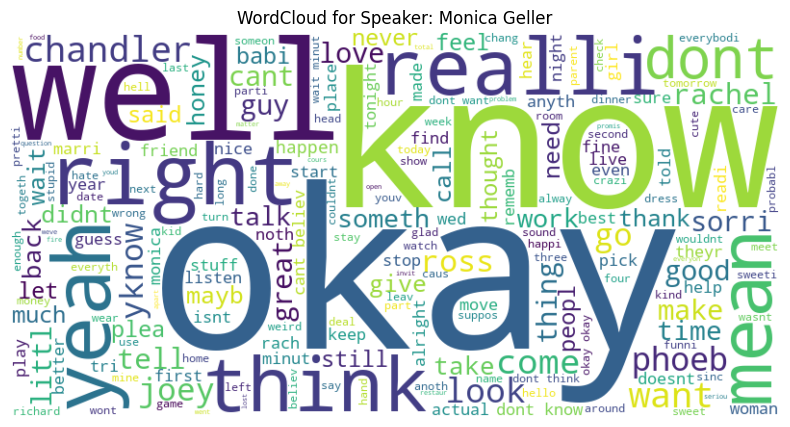

c:\Users\trant\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


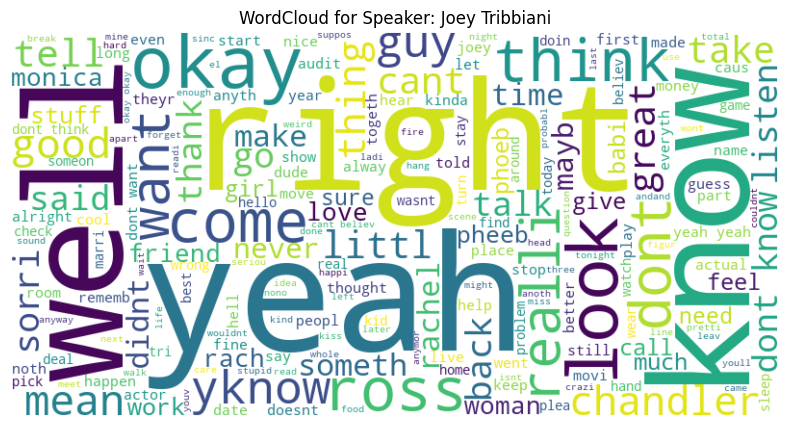

c:\Users\trant\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


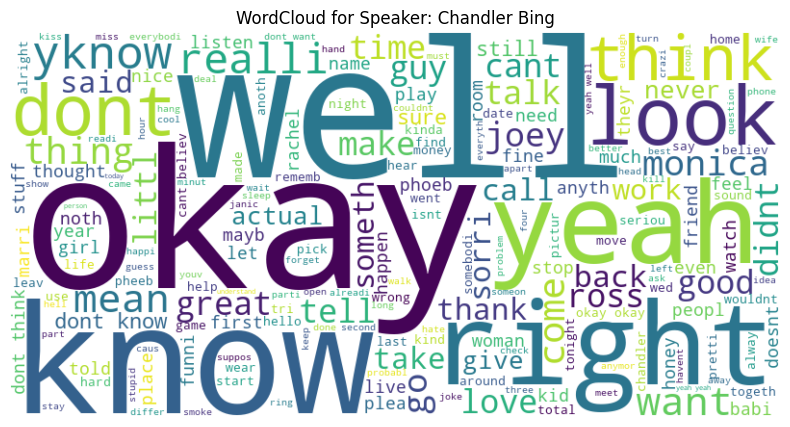

c:\Users\trant\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


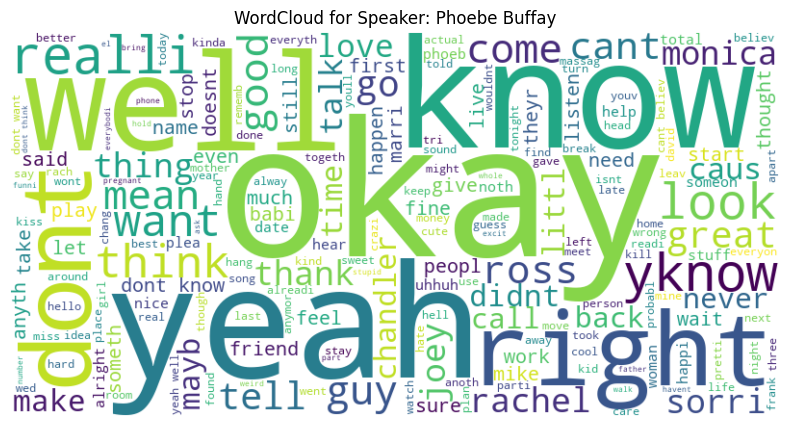

c:\Users\trant\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


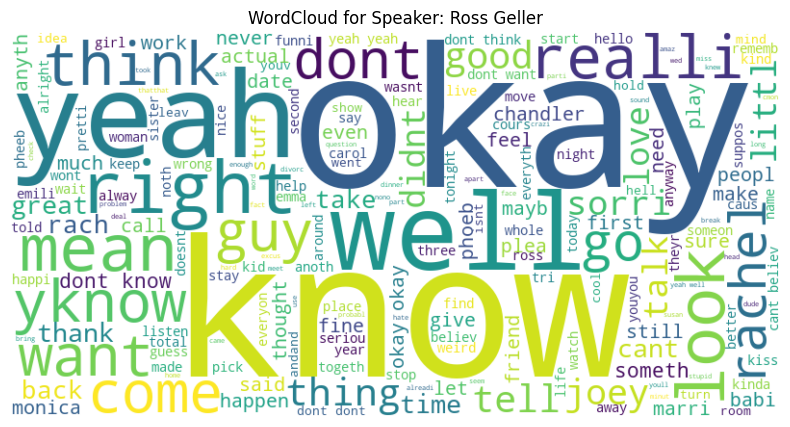

c:\Users\trant\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


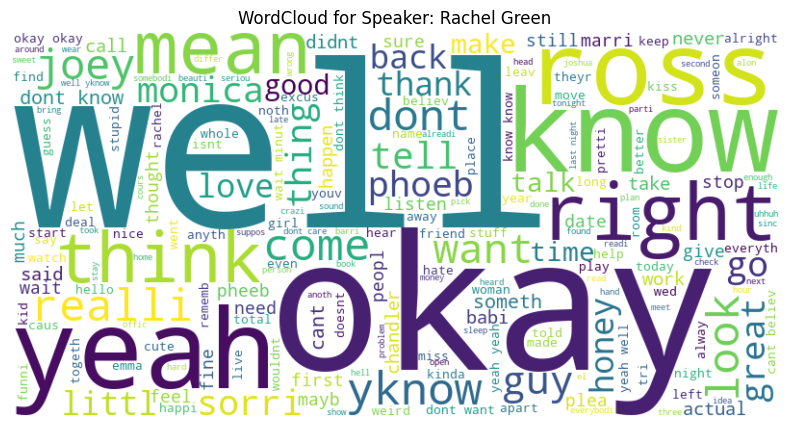

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate WordCloud for a specific speaker
def generate_wordcloud_for_speaker(speaker_name, text_data):
    
    # Combine all text data for the specific speaker and join tokens into a single string
    speaker_text = ' '.join(' '.join(tokens) for tokens in text_data[text_data['speaker'] == speaker_name]['processed_text'])
    
    # Create WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(speaker_text)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Speaker: {speaker_name}')
    plt.show()

# List of specific speakers to visualize
speakers_to_visualize = ["Monica Geller", "Joey Tribbiani", "Chandler Bing", "Phoebe Buffay", "Ross Geller", "Rachel Green"]

# Plot the WordCloud for each character
for speaker_name in speakers_to_visualize:
    generate_wordcloud_for_speaker(speaker_name, friends_data)

The WordClouds provide a visual representation of the most frequently used words by each character, where larger words signify higher frequency and significance in their dialogues. As we can see from the visualizations, they mostly talked about each other and other casual topics in day-to-day conversations like most friend groups do!

# IV/ Prepare data for LDA Model Training

In the upcoming section, I aim to employ LDA model training to delve deeper and explore the typical topics that the characters engaged in.

### 1. Import libraries

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from pprint import pprint
import numpy as np

### 2. Create dictionary and corpus

In [ ]:
# Create a Dictionary from the tokenized text data
id2word = Dictionary(friends_data['processed_text'])

# Term Document Frequency
corpus = [id2word.doc2bow(tokens) for tokens in friends_data['processed_text']]

### 3. Find the optimal number of topics using Grid Search

To effectively train the LDA model, a predefined number of topics is necessary. To determine the optimal number of topics, I conducted a grid search across a range (from 5 to a maximum of 30 topics). The model generated at each iteration will be evaluated using coherence score. This approach aimed to identify the number of topics that yielded the most meaningful results.

Optimal Number of Topics: 5
Coherence Score for Optimal Number of Topics: 0.5343271888499882


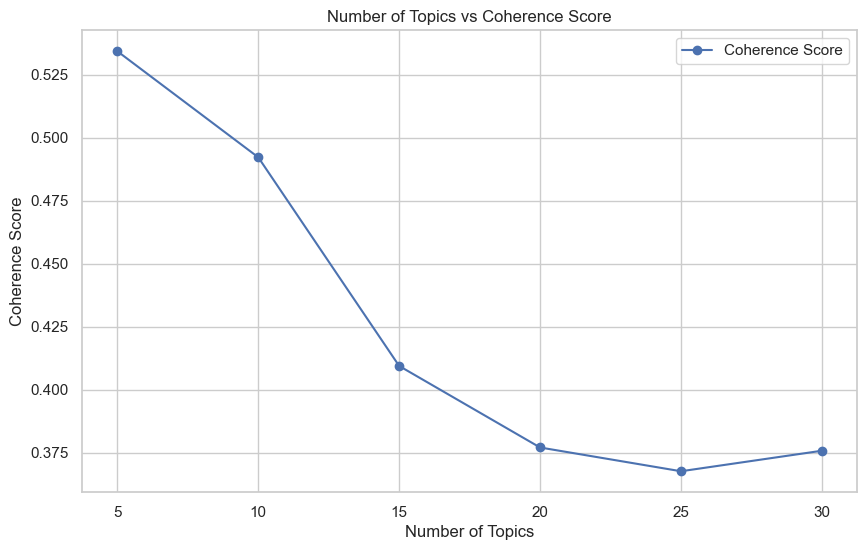

In [101]:
# Specify the range of number of topics to search within
min_topics = 5
max_topics = 30
step_size = 5
topics_range = range(min_topics, max_topics+1, step_size)

# Perform Grid Search and compute coherence scores for different number of topics
coherence_scores = []
for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=friends_data['processed_text'], dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

# Find the optimal number of topics with the highest coherence score
optimal_num_topics = topics_range[np.argmax(coherence_scores)]
print("Optimal Number of Topics:", optimal_num_topics)
print("Coherence Score for Optimal Number of Topics:", max(coherence_scores))

# Plotting the relationship between the number of topics and coherence score
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o', color='b', label='Coherence Score')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Number of Topics vs Coherence Score')
plt.xticks(topics_range)
plt.legend()
plt.grid(True)
plt.show()

In [102]:
print(coherence_scores)

[0.5343271888499882, 0.4922402141213322, 0.40942343447465535, 0.3770686640569837, 0.36763971333386103, 0.37578236467832393]


In [106]:
print(optimal_num_topics)

5


# V/ LDA Model Training

After conducting the grid search analysis, it became evident that the most optimal number of topics for our dataset was determined to be 5. This specific number of topics yielded the highest coherence score, indicating a better alignment of topics within the conversations. Subsequently, I utilize this optimal value as the input parameter for training the LDA model to ensure a focused and insightful exploration of the underlying themes present in the Friends dialogues.

In [83]:
# Number of topics for the LDA model
num_topics = 5

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Print the topics
pprint(lda_model.print_topics())

[(0,
  '0.059*"joey" + 0.055*"scene" + 0.052*"chandler" + 0.051*"monica" + '
  '0.044*"rachel" + 0.039*"ross" + 0.037*"phoeb" + 0.021*"apart" + '
  '0.018*"wait" + 0.015*"enter"'),
 (1,
  '0.033*"that" + 0.031*"thank" + 0.030*"realli" + 0.030*"great" + '
  '0.029*"come" + 0.018*"babi" + 0.015*"back" + 0.014*"call" + 0.011*"door" + '
  '0.011*"nice"'),
 (2,
  '0.037*"right" + 0.028*"sorri" + 0.023*"she" + 0.020*"sure" + 0.016*"what" + '
  '0.014*"talk" + 0.014*"plea" + 0.012*"name" + 0.012*"go" + 0.012*"could"'),
 (3,
  '0.063*"know" + 0.047*"dont" + 0.031*"well" + 0.027*"like" + 0.024*"want" + '
  '0.024*"think" + 0.022*"mean" + 0.017*"realli" + 0.012*"guy" + 0.011*"that"'),
 (4,
  '0.083*"yeah" + 0.069*"okay" + 0.041*"your" + 0.028*"cant" + 0.028*"good" + '
  '0.026*"love" + 0.022*"right" + 0.021*"look" + 0.019*"well" + 0.016*"littl"')]


# VI/ LDA Model Assessment using Coherence Score

In the previous step where I determined the optimal number of topics, I utilized the coherence score to assess the LDA model. However, let's explore this score in greater detail in this section.

- Topic Coherence metrics evaluate a single topic by assessing the semantic similarity among the highly ranked words within that topic. The Gensim library provides a class that implements the four most famous coherence models: u_mass, c_v, c_uci, c_npmi. 

- In the "Friends" dataset, the text consists of everyday conversations among the series' characters. Because of this simple and straightforward language, there's no requirement for a complex model to evaluate topic coherence. I've opted for the c_v coherence model in the LDA analysis. It specifically assesses the co-occurrence of words and the uniqueness of topics. Given the nature of casual dialogues, this approach provides a sufficient and suitable evaluation for our dataset.

In [88]:
# import the CoherenceModel class from the Gensim library
from gensim.models.coherencemodel import CoherenceModel

# compute Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=friends_data['processed_text'], dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# print out result
print(f'Coherence Score: {coherence_score}')


Coherence Score: 0.5494312149358753


Considering the c_v coherence score ranges from 0 to 1, a c_v coherence score of 0.549 suggests a moderate level of topic coherence, indicating that the topics extracted from the "Friends" dataset are reasonably interpretable and coherent.

# VII/ Topic modeling visualization using pyLDAvis library

Utilizing the pyLDAvis interactive visualization library in Python, I generated interactive visualizations for the 5 topics discovered earlier in our 'Friends' dataset. These visualizations have been saved as an HTML file. You can open the HTML file in your web browser manually to interact with the visualization.

In [84]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Create the 'results' directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Prepare the LDA visualization data
LDAvis_data_filepath = './results/ldavis_prepared_' + str(num_topics) + '.pkl'

# If you haven't prepared the visualization data, create it
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Save the interactive visualization as an HTML file
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_' + str(num_topics) + '.html')

# Print a message indicating where the HTML file is saved
print(f"Interactive LDA visualization saved as 'ldavis_prepared_{num_topics}.html'")

# Now you can open the HTML file in your web browser manually to interact with the visualization
file:///C:/Users/trant/OneDrive/Documents/Portfolio%20Projects/results/ldavis_prepared_5.html#topic=0&lambda=1&term=

Interactive LDA visualization saved as 'ldavis_prepared_5.html'
